In [ ]:
!pip install pytesseract pillow langchain langchain_groq tiktoken pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.1/417.1 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.45
    Uninstalling langchain-core-0.3.45:
      Successfully uninstalled langchain-core-0.3.45


In [ ]:
!pip install langchain-community
!pip install langchain_experimental langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.6
    Uninstalling langchain-text-splitters-0.3.6:
      Successfully uninstalled langchain-text-splitters-0.3.6
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.20
    Uninstalling langchain-0.3.20:
      Successfully uninstalled langchain-0.3.20
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install pytesseract

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract pillow google-colab langchain langchain_groq

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,237 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,692 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packa

Saving Valid-Land Record Details.jpg to Valid-Land Record Details.jpg

✅ Uploaded File: Valid-Land Record Details.jpg


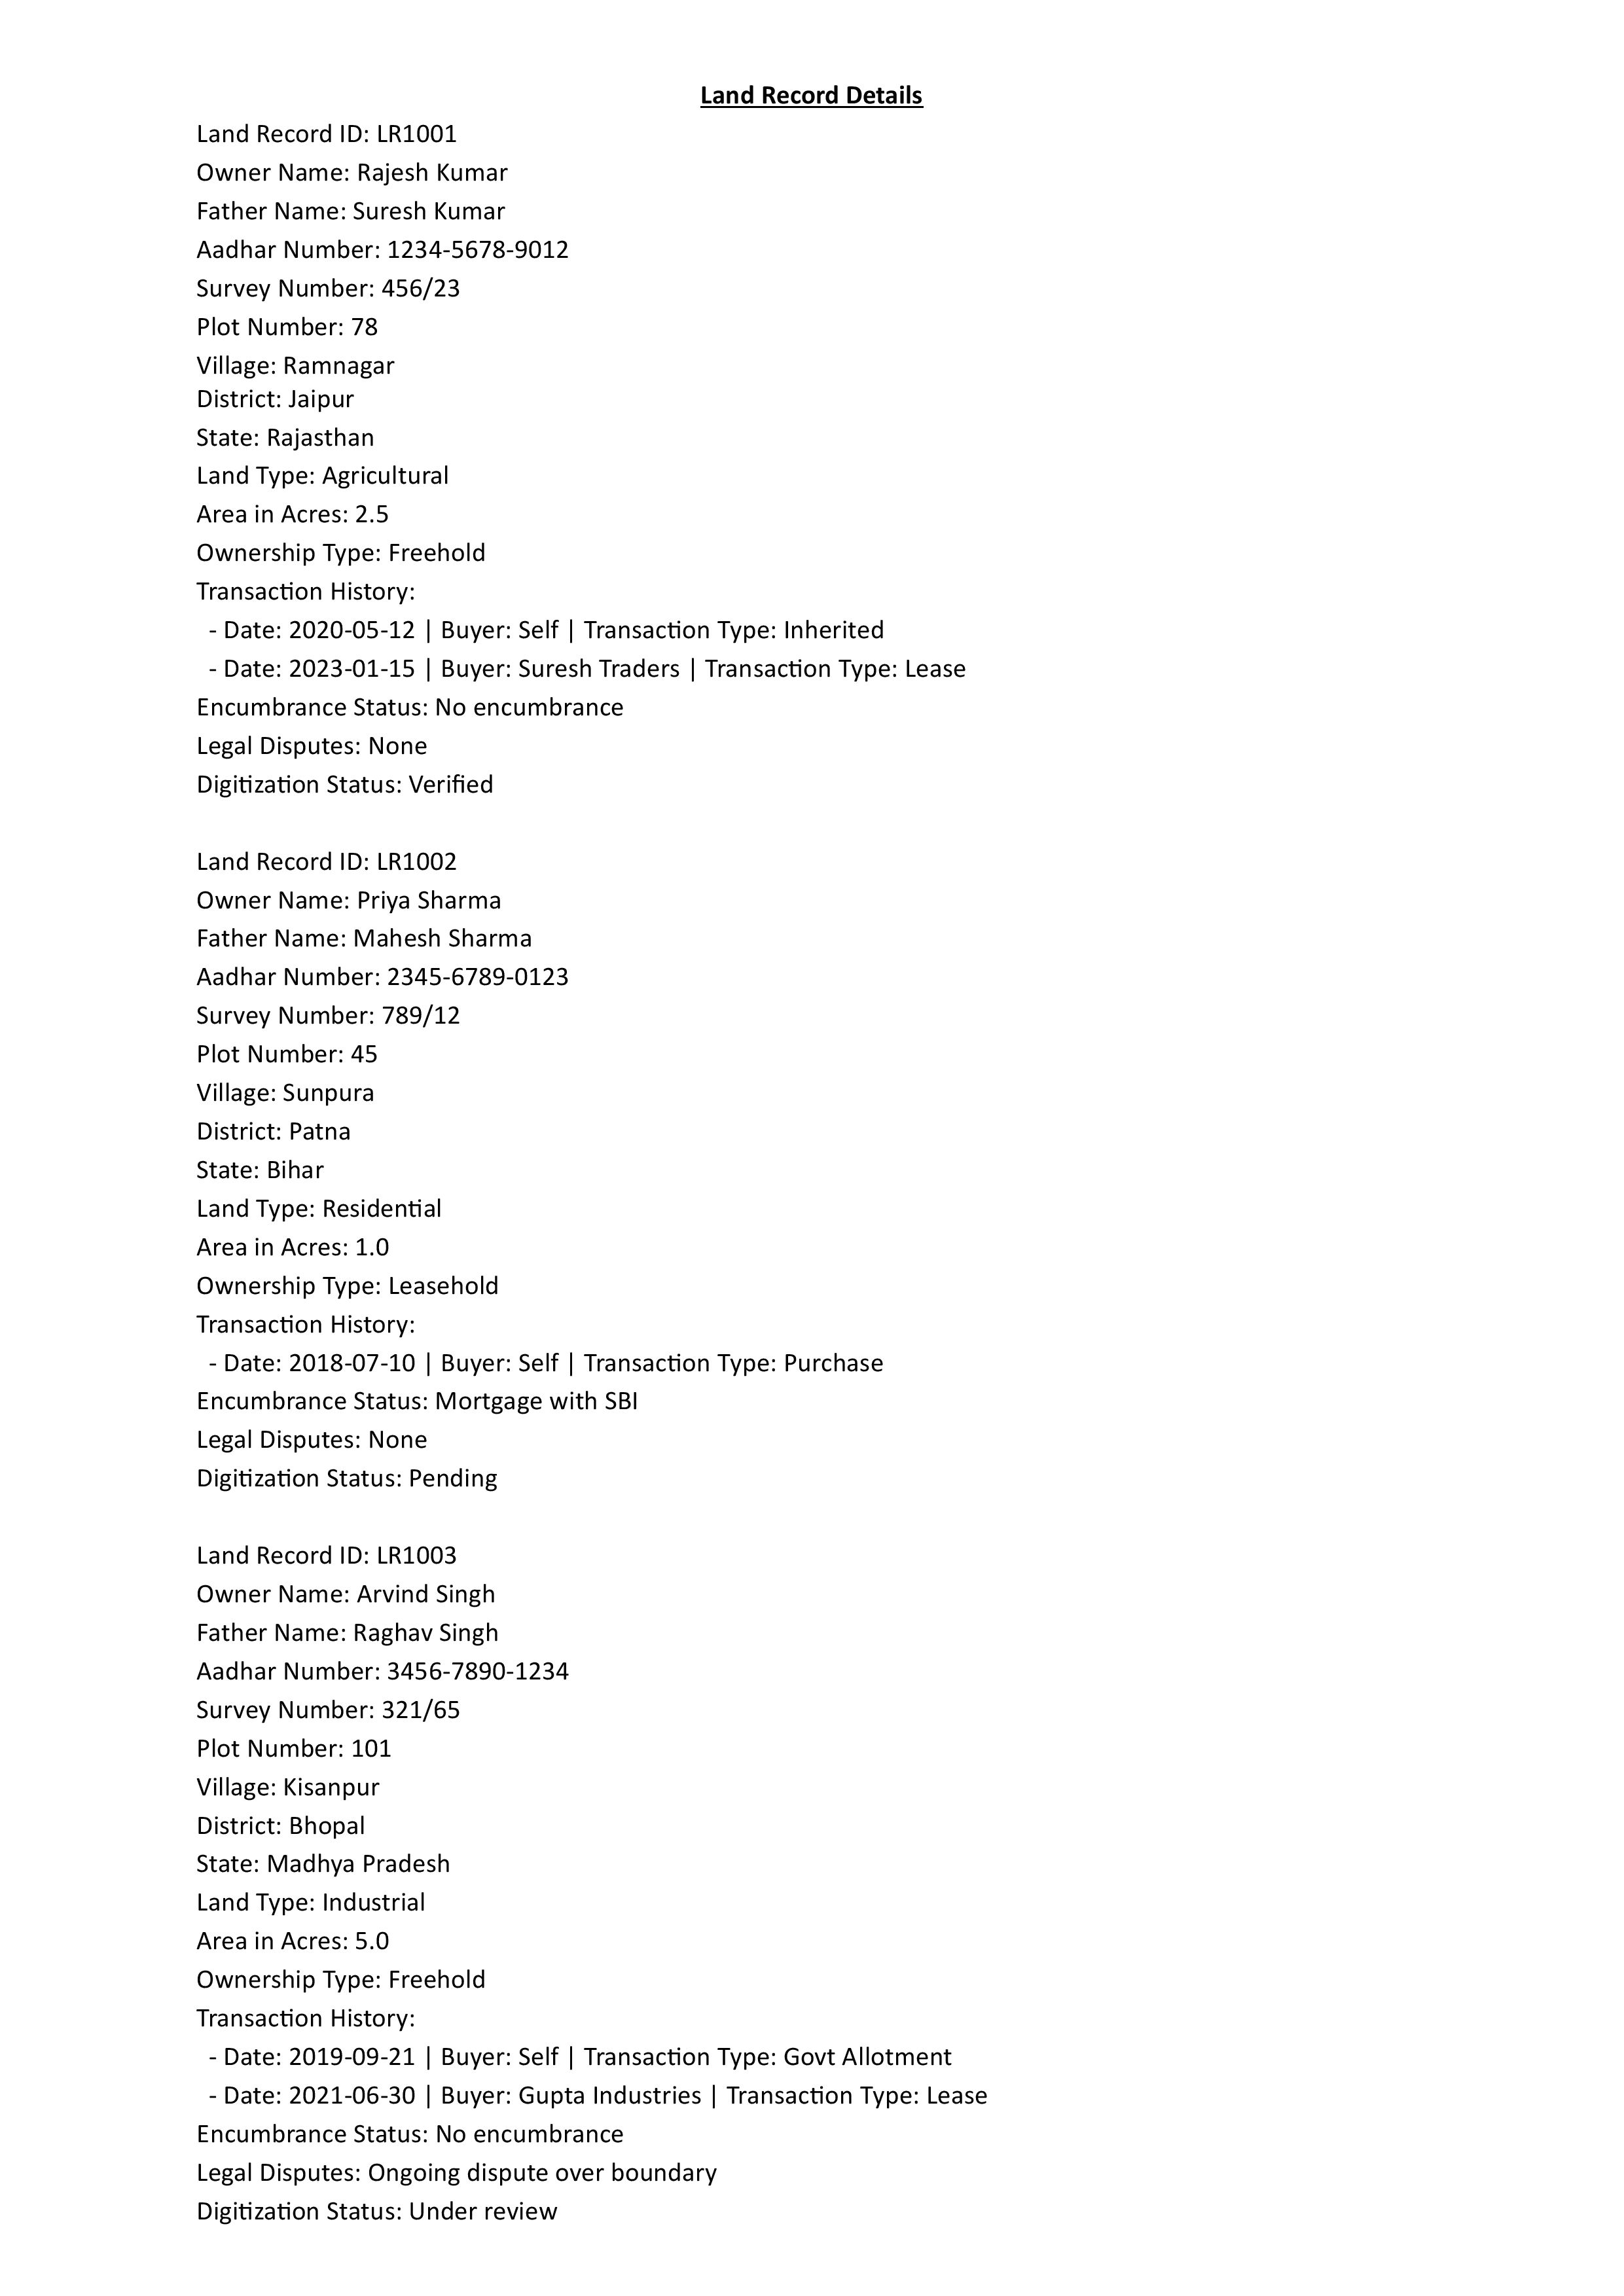


✅ Structured Data (Valid JSON):
 {
    "records": [
        {
            "Land Record ID": "LR1001",
            "Owner Name": "Rajesh Kumar",
            "Father Name": "Suresh Kumar",
            "Aadhar Number": "XXXX-XXXX-9012",
            "Survey Number": "456/23",
            "Plot Number": "78",
            "Village": "Ramnagar",
            "District": "Jaipur",
            "State": "Rajasthan",
            "Land Type": "Agricultural",
            "Area in Acres": "2.5",
            "Ownership Type": "Freehold",
            "Encumbrance Status": "No encumbrance",
            "Legal Disputes": "None",
            "Digitization Status": "Verified",
            "Transaction History": [
                {
                    "Date": "12-05-2020",
                    "Buyer": "Self",
                    "Transaction Type": "Inherited"
                },
                {
                    "Date": "15-01-2023",
                    "Buyer": "Suresh Traders",
                    "T

In [ ]:
import os
import json
import re
import pytesseract
import cv2
import numpy as np
from PIL import Image
from google.colab import files
import IPython.display as display
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
#from langchain.chains import LLMChain
from langchain.chains import LLMChain

# Set Groq API Key securely (DO NOT hardcode it in production)
os.environ["GROQ_API_KEY"] = "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"

# Initialize Groq Chat Model (Llama3-70B)
llm = ChatGroq(model_name="llama3-70b-8192", temperature=0)

# Set the Tesseract path for OCR
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

# Upload an image file
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]
print(f"\n✅ Uploaded File: {image_path}")

# Open and display the image
image = Image.open(image_path)
display.display(image)

# Convert image to grayscale and apply preprocessing for low-quality scans
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img = cv2.GaussianBlur(img, (5, 5), 0)  # Reduce noise
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)  # Enhance contrast
    return img

# Apply preprocessing
processed_image = preprocess_image(image_path)

# Save the processed image
preprocessed_path = "processed_image.png"
cv2.imwrite(preprocessed_path, processed_image)

# Extract text using OCR with better configuration for low-quality scans
extracted_text = pytesseract.image_to_string(preprocessed_path, config="--psm 6").strip()
#print("\n🔹 Extracted OCR Text:\n", extracted_text)

# Function to validate and extract survey numbers
def extract_survey_numbers(text):
    """Extract all survey numbers matching the pattern '123/456' and detect invalid ones."""

    valid_survey_pattern = re.compile(r"\b(\d{1,4}/\d{1,4})\b")  # Matches valid format "123/456"
    invalid_survey_pattern = re.compile(r"\b(\d+/\D+|\D+/\d+|\D+/\D+|\d{5,}/\d+|\d+/\d{5,})\b")  # Invalid cases

    valid_matches = valid_survey_pattern.findall(text)
    invalid_matches = invalid_survey_pattern.findall(text)

    if valid_matches:
        return list(set(valid_matches))  # ✅ Return unique valid survey numbers

    if invalid_matches:
        return ["Invalid Survey Number"]  # 🚨 Detects incorrectly formatted survey numbers

    return ["Missing Survey Number"]

# Validate extracted survey number
survey_number = extract_survey_numbers(extracted_text)
#print(f"\n🔍 Validated Survey Number: {survey_number}")

# Define LLM Prompt Template
prompt = PromptTemplate(
    input_variables=["text"],
    template="""
    Extract the key details from the following land record text:
    {text}

    - Identify **all occurrences** of land records in the text.
    - Ensure each owner is assigned the **correct Survey Number** from the text.
    - If no valid survey number is found, mark it as "Missing Survey Number".
    - Extract each **Survey Number** and validate its format.
    - The **correct format** is: `"123/12"` (Only numeric values on both sides of `/`).
    - **If the survey number contains any letters or extra characters, mark it as "Invalid Survey Number".**
    - **Mask all Aadhar numbers** by replacing the first 8 digits with `XXXX-XXXX-`, keeping only the last four digits visible.
    - **Remove duplicate records**, ensuring each land record appears only once in the output.
    - **Return JSON only** (no extra text). Ensure it is **valid JSON format**.
    - **Ensure Date field format is dd-mm-yyyy**.

    **Example Format:**
    {{
        "records": [
            {{
                "Land Record ID": "",
                "Owner Name": "",
                "Father Name": "",
                "Aadhar Number": "",
                "Survey Number": "",
                "Plot Number": "",
                "Village": "",
                "District": "",
                "State": "",
                "Land Type": "",
                "Area in Acres": "",
                "Ownership Type": "",
                "Encumbrance Status": "",
                "Legal Disputes": "",
                "Digitization Status": "",
                "Transaction History": [
                    {{
                        "Date": "dd-mm-yyyy",
                        "Buyer": "",
                        "Transaction Type": ""
                    }},
                    {{
                        "Date": "dd-mm-yyyy",
                        "Buyer": "",
                        "Transaction Type": ""
                    }}
                ]
            }}
        ]
    }}
    """
)

# Create LLM processing chain
chain = LLMChain(llm=llm, prompt=prompt)

#structured_data = chain.run(extracted_text)
#structured_data = chain.run(extracted_text).strip()

# Run chain with extracted text and validated survey number
#structured_data = chain.run({"text": extracted_text, "survey_number": survey_number}).strip()
structured_data = chain.run({"text": extracted_text}).strip()

def clean_json_output(text):
    """ Extracts valid JSON content using regex """
    json_match = re.search(r'\{.*\}', text, re.DOTALL)  # Find JSON structure
    return json_match.group(0) if json_match else None

# Try to clean JSON output
cleaned_json = clean_json_output(structured_data)

if cleaned_json:
    try:
        structured_data_json = json.loads(cleaned_json)  # Validate JSON

        print("\n✅ Structured Data (Valid JSON):\n", json.dumps(structured_data_json, indent=4))
    except json.JSONDecodeError:
        print("\n❌ Error: Even after cleaning, JSON is invalid.")
else:
    print("\n❌ No valid JSON found in LLM response.")

In [ ]:
!pip install chromadb
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.5 MB/s eta 0:0

In [ ]:
import json
import chromadb
from chromadb.utils import embedding_functions
from sentence_transformers import SentenceTransformer

# Initialize ChromaDB client (Persistent Storage)
chroma_client = chromadb.PersistentClient(path="./chroma_land_records")

# Create or get the collection
collection = chroma_client.get_or_create_collection(name="land_records")

# Load Sentence Transformer model for embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

def store_json_in_chroma(json_data):
    """Processes JSON and stores it in ChromaDB with vector embeddings."""

    records = json_data.get("records", [])

    for record in records:
        # Generate unique ID
        land_record_id = record.get("Land Record ID", f"LR-{record['Survey Number']}-{record['Owner Name']}")

        # Convert list fields (e.g., Transaction History) into JSON string
        record["Transaction History"] = json.dumps(record.get("Transaction History", []))  # Convert to string

        # Extract relevant text to embed
        text_data = f"Owner: {record['Owner Name']}, Survey Number: {record['Survey Number']}, Village: {record['Village']}, District: {record['District']}, Land Type: {record['Land Type']}"

        # Generate vector embeddings
        embedding = embedding_model.encode(text_data).tolist()

        # Store in ChromaDB
        collection.add(
            ids=[land_record_id],  # Unique ID
            metadatas=[record],  # Store full land record as metadata
            embeddings=[embedding]  # Store vector embeddings
        )

    print("✅ JSON Data Successfully Stored in ChromaDB.")

# Store the structured JSON in ChromaDB
store_json_in_chroma(structured_data_json)


✅ JSON Data Successfully Stored in ChromaDB.


In [ ]:
# Initialize ChromaDB client (same path as before)
import chromadb

chroma_client = chromadb.PersistentClient(path="./chroma_land_records")

# List all collections
#collections = chroma_client.list_collections()

# Get the "land_records" collection
collection = chroma_client.get_collection(name="land_records")

# Get the number of records stored
print(f"Total Records Stored: {collection.count()}")


Total Records Stored: 3


In [ ]:
import os
import pandas as pd
import json
import ipywidgets as widgets
from IPython.display import display
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq

# ✅ Initialize Groq LLM
os.environ["GROQ_API_KEY"] = "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"
llm = ChatGroq(model_name="llama3-70b-8192", temperature=0)

# ✅ Define LLM Prompt Template for Formatting Search Results
search_prompt = PromptTemplate(
    input_variables=["survey_number", "records"],
    template="""
   Extract and return only the "Transaction History" from the provided records.

    - Ensure all transactions include "Date", "Buyer", and "Transaction Type".
    - Format dates as dd-mm-yyyy.
    - Ensure JSON format is correct.

    **Example Output Format:**
    {
        "Transaction History": [
            {
                "Date": "dd-mm-yyyy",
                "Buyer": "",
                "Transaction Type": ""
            }
        ]
    }

    **Records Provided:**
    {records}
    """
)

def search_and_display(survey_number):
    results = collection.get(where={"Survey Number": survey_number})
    metadata_list = results.get("metadatas", [])

    if metadata_list:
        df = pd.DataFrame(metadata_list)
        # ✅ Reset index and drop default serial number
        df = df.reset_index(drop=True)
        # ✅ Hide index column when displaying
        display(df.style.hide(axis="index"))
        #display(df)
    else:
        print(f"No records found for Survey Number: {survey_number}")

        # Create search input box and button
search_box = widgets.Text(
    placeholder="Enter Survey Number (e.g., 456/23)"
)
search_button = widgets.Button(description="Search")

# Define button click event
def on_search_clicked(b):
    search_and_display(search_box.value)

search_button.on_click(on_search_clicked)

# Display the search box and button
display(search_box, search_button)


Text(value='', placeholder='Enter Survey Number (e.g., 456/23)')

Button(description='Search', style=ButtonStyle())

In [ ]:
import json
import pandas as pd
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq
import os

# ✅ Initialize Groq LLM
os.environ["GROQ_API_KEY"] = "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"
llm = ChatGroq(model_name="llama3-70b-8192", temperature=0)

# ✅ Define LLM Prompt Template for FAQs
faq_prompt = PromptTemplate(
    input_variables=[],
    template="""
    Generate frequently asked questions (FAQs) on land ownership, disputes, and transactions. Provide a structured JSON format with the following:
    - Category: Ownership, Disputes, Transactions
    - Question: The frequently asked question
    - Answer: The detailed answer

    **Example JSON Format:**
    {{
        "faqs": [
            {{"Category": "Ownership", "Question": "How can I check land ownership details?", "Answer": "You can check land ownership details through the official land records portal..."}},
            {{"Category": "Disputes", "Question": "What are common causes of land disputes?", "Answer": "Land disputes can arise due to unclear ownership, boundary issues..."}},
            {{"Category": "Transactions", "Question": "What is an encumbrance certificate?", "Answer": "An encumbrance certificate (EC) verifies whether land has any legal dues..."}}
        ]
    }}

    **Generate at least 10 FAQs covering various aspects.**
    """
)

# ✅ Create LLM processing chain
chain = LLMChain(llm=llm, prompt=faq_prompt)
structured_faqs = chain.run({"topic": "land ownership, disputes, and transactions"}).strip()

# ✅ Function to clean JSON output
def clean_json_output(text):
    """ Extracts valid JSON content using regex """
    import re
    json_match = re.search(r'\{.*\}', text, re.DOTALL)
    return json_match.group(0) if json_match else None

cleaned_json = clean_json_output(structured_faqs)

if cleaned_json:
    try:
        faqs_data = json.loads(cleaned_json)  # Validate JSON
        df = pd.DataFrame(faqs_data.get("faqs", []))  # Convert JSON to DataFrame
        print("\n✅ AI-Generated FAQs on Land Issues:\n")
        display(df)  # Display as DataFrame
    except json.JSONDecodeError:
        print("\n❌ Error: JSON is invalid.")
else:
    print("\n❌ No valid JSON found in LLM response.")


✅ AI-Generated FAQs on Land Issues:



,Category,Question,Answer
0,Ownership,How can I check land ownership details?,You can check land ownership details through t...
1,Ownership,What is the difference between freehold and le...,Freehold property means you own the land and p...
2,Disputes,What are common causes of land disputes?,Land disputes can arise due to unclear ownersh...
3,Disputes,How can I resolve a land dispute?,You can resolve a land dispute through mediati...
4,Transactions,What is an encumbrance certificate?,An encumbrance certificate (EC) verifies wheth...
5,Transactions,What is the process of transferring property o...,The process of transferring property ownership...
6,Ownership,Can I buy land without seeing it?,It's not recommended to buy land without seein...
7,Disputes,How long does it take to resolve a land dispute?,The time it takes to resolve a land dispute va...
8,Transactions,What is the role of a lawyer in a property tra...,A lawyer plays a crucial role in a property tr...
9,Ownership,Can I sell a property that's still under const...,"Yes, you can sell a property that's still unde..."


In [ ]:
import os
import json
import pandas as pd
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq

# ✅ Initialize Groq LLM
os.environ["GROQ_API_KEY"] = "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"
llm = ChatGroq(model_name="llama3-70b-8192", temperature=0)

# ✅ Define LLM Prompt Template for Reports
report_prompt = PromptTemplate(
    input_variables=["land_data"],
    template="""
    Analyze the following land transaction data and generate a structured report:

    **Data:**
    {land_data}

    **Report Requirements:**
    - **Land Ownership Trends:** Identify patterns in ownership changes over time.
    - **Transaction Patterns:** Find common types of transactions (sale, lease, inheritance, etc.).
    - **Encroachment Cases:** Identify records with encroachment disputes.
    - Ensure output is **VALID JSON ONLY** without any additional text.

    **Output Format (Example)**:
    {{
        "Land Ownership Trends": {{
            "Most Frequent Buyer": "XYZ Developers",
            "Ownership Transfers Per Year": {{
                "2022": 150,
                "2023": 200
            }}
        }},
        "Transaction Patterns": {{
            "Total Transactions": 500,
            "Most Common Type": "Lease",
            "Highest Transaction Value": "₹5 Cr"
        }},
        "Encroachment Cases": {{
            "Total Cases": 20,
            "High-Risk Areas": ["Region A", "Region B"]
        }}
    }}
    """
)

# ✅ Fetch data from ChromaDB
def fetch_land_data():
    results = collection.get()
    metadata_list = results.get("metadatas", [])
    return json.dumps(metadata_list[:50])  # Limiting to 50 records for processing

# ✅ Extract valid JSON using regex
def extract_valid_json(text):
    json_match = re.search(r"\{.*\}", text, re.DOTALL)  # Find JSON structure
    return json_match.group(0) if json_match else None

# ✅ Generate Land Report
def generate_land_report():
    land_data = fetch_land_data()
    chain = LLMChain(llm=llm, prompt=report_prompt)

    llm_output = chain.run({"land_data": land_data}).strip()

    # ✅ Extract valid JSON if LLM adds extra text
    cleaned_json = extract_valid_json(llm_output)

    if cleaned_json:
        try:
            report_json = json.loads(cleaned_json)  # Convert to JSON
            df = pd.DataFrame(report_json.items(), columns=["Category", "Details"])
            pd.set_option("display.max_colwidth", None)  # Show full text in DataFrame
            pd.set_option("display.expand_frame_repr", False)  # Prevents line wrapping
            print(df)  # ✅ Display report in DataFrame format
        except json.JSONDecodeError:
            print("❌ Error: Extracted JSON is still invalid.")
    else:
        print("❌ Error: No valid JSON found in LLM response.")

# ✅ Run the report generation
generate_land_report()


                Category                                                                                                                   Details
0  Land Ownership Trends  {'Most Frequent Buyer': 'Self', 'Ownership Transfers Per Year': {'2018': 1, '2019': 1, '2020': 1, '2021': 1, '2023': 1}}
1   Transaction Patterns                                 {'Total Transactions': 5, 'Most Common Type': 'Lease', 'Highest Transaction Value': None}
2     Encroachment Cases                                                                       {'Total Cases': 1, 'High-Risk Areas': ['Kisanpur']}
